In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Sapienza/DL

/content/drive/MyDrive/Sapienza/DL


In [181]:
import pickle
import pandas as pd
import numpy as np
import json
import itertools
import gensim
path="SEMEVAL-2021-task6-corpus/data/"


In [182]:
with open('training_task1_labels.pkl', 'rb') as handle:
    train_labs = pickle.load(handle)

with open('original_training_task1_features.pkl', 'rb') as handle:
    train_feats = pickle.load(handle)

with open('training_task1_all_labels.pkl', 'rb') as handle:
    all_labels = pickle.load(handle)

with open('dev_task1_labels.pkl', 'rb') as handle:
    dev_labs = pickle.load(handle)

with open('original_dev_task1_features.pkl', 'rb') as handle:
    dev_feats = pickle.load(handle)

with open('test_task1_labels.pkl', 'rb') as handle:
    test_labs = pickle.load(handle)

with open('original_test_task1_features.pkl', 'rb') as handle:
    test_feats = pickle.load(handle)


In [183]:
train_feats[:5]

['THERE ARE ONLY TWO GENDERS FEMALE  MALE',
 'This is not an accident!',
 'SO BERNIE BROS HAVENT COMMITTED VIOLENCE EH? POWER COMES FROM THE BARREL OF A GUN, COMRADES. WHAT ABOUT THE ONE WHO SHOT CONGRESSMAN SCALISE OR THE DAYTON OHIO MASS SHOOTER?',
 'PATHETIC The Cowardly Asshole Weak Failure!!! Impeach it again!!! # 45 the coward s afraid of strong women!! POLITICUSUSA.COM Childish Trump Wont Meet With Pelosi On Coronavirus Because He Doesnt Like Her',
 'WHO TRUMP REPRESENTS WHO DEMOCRATS REPRESENT']

In [145]:
import string
train_texts=[]
for val in train_feats:
  val=val.replace('\n',' ')
  val=' '.join(val.split())
  val=val.translate(str.maketrans('', '', string.punctuation))
  train_texts.append(val)
train_texts[:5]

['THERE ARE ONLY TWO GENDERS FEMALE MALE',
 'This is not an accident',
 'SO BERNIE BROS HAVENT COMMITTED VIOLENCE EH POWER COMES FROM THE BARREL OF A GUN COMRADES WHAT ABOUT THE ONE WHO SHOT CONGRESSMAN SCALISE OR THE DAYTON OHIO MASS SHOOTER',
 'PATHETIC The Cowardly Asshole Weak Failure Impeach it again  45 the coward s afraid of strong women POLITICUSUSACOM Childish Trump Wont Meet With Pelosi On Coronavirus Because He Doesnt Like Her',
 'WHO TRUMP REPRESENTS WHO DEMOCRATS REPRESENT']

In [146]:
print(dev_feats[:5])
dev_texts=[]
for val in dev_feats:
  val=val.replace('\n',' ')
  val=' '.join(val.split())
  val=val.lower()
  val=val.translate(str.maketrans('', '', string.punctuation))
  dev_texts.append(val)
dev_texts[:5]

['*President* Biden? Please, no.', 'JOE  VERSUS THE VOLCANIC KREMLIN DON WILL YOU SHUT UP, MAN? LORD OF THE LIES', 'ANTI-VAXXERS BE LIKE...  HANG ON A SEC - JUST COLLECTING MY FACTS', 'VIRUS BINGO FREE 32 SPACE', 'Never thought ld die fighting IRRESPONSIBLY RUSHED VACCINES side by side with an ANTIVAXXER What about side by side with a friend? DONT YOU HAVE A KIDS FUNERAL TO ATTEND OR SOMETHING?']


['president biden please no',
 'joe versus the volcanic kremlin don will you shut up man lord of the lies',
 'antivaxxers be like hang on a sec  just collecting my facts',
 'virus bingo free 32 space',
 'never thought ld die fighting irresponsibly rushed vaccines side by side with an antivaxxer what about side by side with a friend dont you have a kids funeral to attend or something']

In [147]:
train_feats=train_texts
dev_feats=dev_texts

In [184]:
all_labels=np.array(all_labels)
len(all_labels)

23

In [185]:
string_labs=[]

for val in train_labs:
  itemindex = np.where(val==1)[0]
  string_labs.append(all_labels[itemindex].tolist())
string_labs[:3]

[['Black-and-white Fallacy/Dictatorship'],
 [''],
 ['Smears', 'Name calling/Labeling', 'Slogans', 'Loaded Language']]

In [186]:
df={}
df['summaries']=train_feats
df['terms']=string_labs
df=pd.DataFrame(df)
df.head()

,summaries,terms
0,THERE ARE ONLY TWO GENDERS FEMALE MALE,[Black-and-white Fallacy/Dictatorship]
1,This is not an accident!,[]
2,SO BERNIE BROS HAVENT COMMITTED VIOLENCE EH? P...,"[Smears, Name calling/Labeling, Slogans, Loade..."
3,PATHETIC The Cowardly Asshole Weak Failure!!! ...,"[Causal Oversimplification, Smears, Name calli..."
4,WHO TRUMP REPRESENTS WHO DEMOCRATS REPRESENT,[]


In [187]:
train_df=df

In [188]:
terms = tf.ragged.constant(train_df["terms"].values)
lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
lookup.adapt(terms)
vocab = lookup.get_vocabulary()


def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)


print("Vocabulary:\n")
vocab=vocab[1:]
print(vocab)
print(len(vocab))

Vocabulary:

['Loaded Language', 'Name calling/Labeling', 'Smears', '', 'Exaggeration/Minimisation', 'Doubt', 'Slogans', 'Appeal to fear/prejudice', 'Whataboutism', 'Glittering generalities (Virtue)', 'Flag-waving', 'Causal Oversimplification', 'Thought-terminating cliché', "Misrepresentation of Someone's Position (Straw Man)", 'Black-and-white Fallacy/Dictatorship', 'Appeal to authority', 'Reductio ad hitlerum', 'Repetition', 'Obfuscation', ' Intentional vagueness', ' Confusion', 'Bandwagon', 'Presenting Irrelevant Data (Red Herring)']
23


In [189]:
sample_label = train_df["terms"].iloc[2]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['Smears', 'Name calling/Labeling', 'Slogans', 'Loaded Language']
Label-binarized representation: [[0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [190]:
label_binarized.shape

TensorShape([1, 24])

In [191]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from ast import literal_eval

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [192]:
max_seqlen = 64
batch_size = 16
padding_token = "<pad>"
auto = tf.data.AUTOTUNE


def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["terms"].values)
    label_binarized = lookup(labels).numpy()
    dataset = tf.data.Dataset.from_tensor_slices(
        (dataframe["summaries"].values, label_binarized)
    )
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

In [193]:
train_dataset = make_dataset(train_df, is_train=True)

In [194]:
text_batch, label_batch = next(iter(train_dataset))

for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

Abstract: b'COULDNT WASH HANDS IS NOW EXTINCT'
Label(s): ['Thought-terminating cliché']
 
Abstract: b'Transgender man gives birth to non-binary partners baby with female sperm donor If I didnt see it, it didnt happen.'
Label(s): ['' 'Thought-terminating cliché'
 "Misrepresentation of Someone's Position (Straw Man)"]
 
Abstract: b'Reminder: This building in Oklahoma City was blown up and destroyed just 4 days before Hillary Clinton was to be indicted in the Whitewater scandal.  All documents lost!'
Label(s): ['Name calling/Labeling' 'Smears' '' 'Slogans']
 
Abstract: b'WHEN YOURE ANTI TRUMP BUT YOURE PRO RAPIST THEY ALL KNEW AND'
Label(s): ['Name calling/Labeling' 'Smears']
 
Abstract: b'IMAGINE the possibilities if they were to put this much effort into cleaning up blighted communities.'
Label(s): ['Name calling/Labeling' 'Smears' 'Glittering generalities (Virtue)']
 


In [195]:
string_labs=[]

for val in dev_labs:
  itemindex = np.where(val==1)[0]
  string_labs.append(all_labels[itemindex].tolist())
string_labs[:3]

[[''], ['Name calling/Labeling', 'Loaded Language'], ['']]

In [196]:
val_df={}
val_df['summaries']=dev_feats
val_df['terms']=string_labs
val_df=pd.DataFrame(val_df)
val_df.head()

,summaries,terms
0,"*President* Biden? Please, no.",[]
1,JOE VERSUS THE VOLCANIC KREMLIN DON WILL YOU ...,"[Name calling/Labeling, Loaded Language]"
2,ANTI-VAXXERS BE LIKE... HANG ON A SEC - JUST ...,[]
3,VIRUS BINGO FREE 32 SPACE,[]
4,Never thought ld die fighting IRRESPONSIBLY RU...,"[Name calling/Labeling, Exaggeration/Minimisat..."


In [197]:
validation_dataset = make_dataset(val_df, is_train=False)


In [198]:
vocabulary = set()
train_df["summaries"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

3940


In [199]:
text_vectorizer = layers.TextVectorization(
    max_tokens=vocabulary_size, ngrams=2, output_mode="tf_idf"
)

# `TextVectorization` layer needs to be adapted as per the vocabulary from our
# training set.
with tf.device("/CPU:0"):
    text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

train_dataset = train_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
validation_dataset = validation_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)


In [200]:
list(validation_dataset)

[(<tf.Tensor: shape=(16, 3940), dtype=float32, numpy=
  array([[ 21.650717 ,   0.       ,   0.       , ...,   0.       ,
            0.       ,   0.       ],
         [ 97.42822  ,   2.286308 ,   0.       , ...,   0.       ,
            0.       ,   0.       ],
         [ 64.95215  ,   0.       ,   0.       , ...,   0.       ,
            0.       ,   0.       ],
         ...,
         [ 86.60287  ,   0.       ,   0.       , ...,   0.       ,
            0.       ,   0.       ],
         [216.50717  ,   0.       ,   2.8283648, ...,   0.       ,
            0.       ,   0.       ],
         [178.61841  ,   1.143154 ,   0.       , ...,   0.       ,
            0.       ,   0.       ]], dtype=float32)>,
  <tf.Tensor: shape=(16, 24), dtype=float32, numpy=
  array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.],
    

In [201]:
def make_model():
    model = keras.Sequential(
        [
            layers.Dense(1024, activation="relu"),
            layers.Dropout(0.5),
            layers.Dense(512, activation="relu"),
            layers.Dropout(0.5),
            layers.Dense(256, activation="relu"),
            layers.Dense(lookup.vocabulary_size(), activation="sigmoid"),
        ]
    )
    return model

In [166]:
#without any preprocessing: train categorical acc: 85%, val categorical acc: 52%
#lower case and removing punctuations and \n: train categorical acc: 71%, val categorical acc: 44%


Epoch 1/40
43/43 [==============================] - 2s 35ms/step - loss: 0.3485 - categorical_accuracy: 0.3459 - val_loss: 0.3220 - val_categorical_accuracy: 0.1746
Epoch 2/40
43/43 [==============================] - 1s 33ms/step - loss: 0.2443 - categorical_accuracy: 0.4331 - val_loss: 0.2501 - val_categorical_accuracy: 0.3016
Epoch 3/40
43/43 [==============================] - 3s 70ms/step - loss: 0.1911 - categorical_accuracy: 0.5174 - val_loss: 0.2415 - val_categorical_accuracy: 0.5238
Epoch 4/40
43/43 [==============================] - 1s 33ms/step - loss: 0.1520 - categorical_accuracy: 0.6047 - val_loss: 0.2329 - val_categorical_accuracy: 0.5714
Epoch 5/40
43/43 [==============================] - 1s 32ms/step - loss: 0.1173 - categorical_accuracy: 0.6715 - val_loss: 0.2389 - val_categorical_accuracy: 0.3333
Epoch 6/40
43/43 [==============================] - 1s 32ms/step - loss: 0.0869 - categorical_accuracy: 0.6991 - val_loss: 0.2571 - val_categorical_accuracy: 0.5238
Epoch 7/40

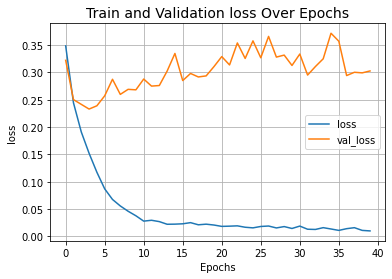

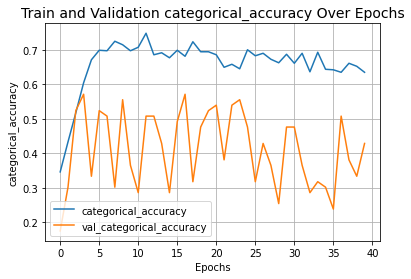

In [202]:
epochs = 40

model = make_model()
model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["categorical_accuracy"]
)

history = model.fit(
    train_dataset, validation_data=validation_dataset, epochs=epochs
)


def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("categorical_accuracy")

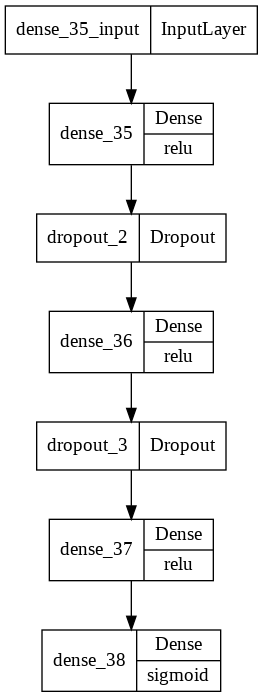

In [105]:
tf.keras.utils.plot_model(
    model, to_file='dnn_model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=True
)